In [1]:
pip install matplotlib

In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "123456",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        return self.connection

### Q1 ###

#### Div, Dis, Year, Month, Total Sales Cube ####

In [3]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query = "select s.division, s.district, tim.year, tim.month, sum(t.total_price) "\
        "from star_schema.fact_table t "\
        "join star_schema.store_dim s on s.store_key=t.store_key "\
        "join star_schema.time_dim tim on tim.time_key=t.time_key "\
        "group by CUBE(s.division, s.district, tim.year, tim.month) "
cur.execute(query)
result = cur.fetchall()
result

[('BARISAL', 'BARGUNA', 2014, None, Decimal('115381.00')),
 ('BARISAL', 'BARISAL', 2014, None, Decimal('400232.50')),
 ('BARISAL', 'BHOLA', 2014, None, Decimal('137067.75')),
 ('BARISAL', 'JHALOKATI', 2014, None, Decimal('73484.75')),
 ('BARISAL', 'PATUAKHALI', 2014, None, Decimal('155733.50')),
 ('BARISAL', 'PIROJPUR', 2014, None, Decimal('137950.75')),
 ('BARISAL', None, 2014, None, Decimal('1019850.25')),
 ('BARISAL', 'BARGUNA', 2015, None, Decimal('119764.50')),
 ('BARISAL', 'BARISAL', 2015, None, Decimal('415748.75')),
 ('BARISAL', 'BHOLA', 2015, None, Decimal('150377.00')),
 ('BARISAL', 'JHALOKATI', 2015, None, Decimal('78806.00')),
 ('BARISAL', 'PATUAKHALI', 2015, None, Decimal('168432.25')),
 ('BARISAL', 'PIROJPUR', 2015, None, Decimal('143774.25')),
 ('BARISAL', None, 2015, None, Decimal('1076902.75')),
 ('BARISAL', 'BARGUNA', 2016, None, Decimal('120026.00')),
 ('BARISAL', 'BARISAL', 2016, None, Decimal('412411.50')),
 ('BARISAL', 'BHOLA', 2016, None, Decimal('144937.50')),
 

#### Division wise sales ####

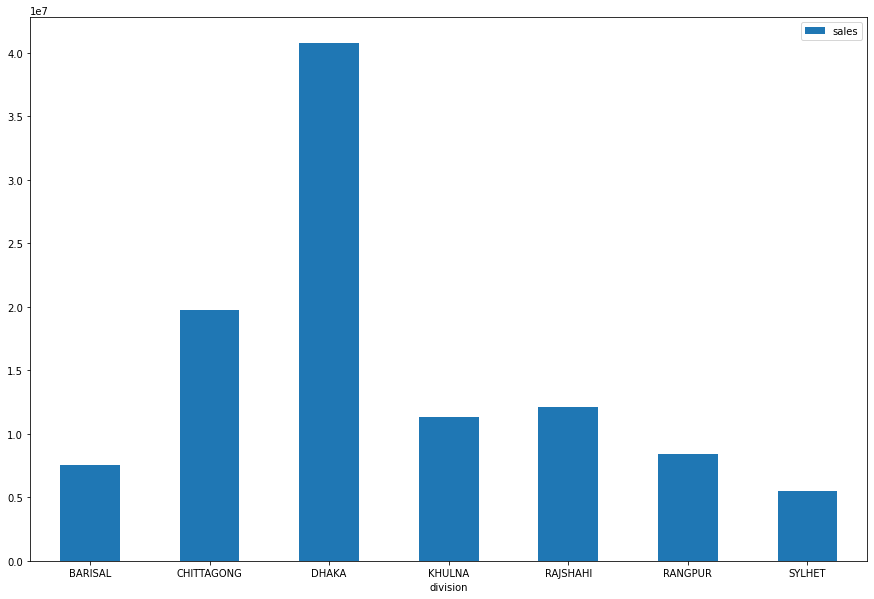

In [4]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query = "select s.division, sum(t.total_price) "\
        "from star_schema.fact_table t "\
        "join star_schema.store_dim s on s.store_key=t.store_key "\
        "group by cube(s.division)"\
        "order by s.division"
cur.execute(query)
result = cur.fetchall()
pd_data = pd.DataFrame(list(result), columns=['division', 'sales'])
pd_data['sales'] = pd_data['sales'].astype('float64')
pd_data = pd_data.dropna()
fig = pd_data.plot.bar(x='division', y='sales', figsize=(15,10), rot=0)

### Q2 ###

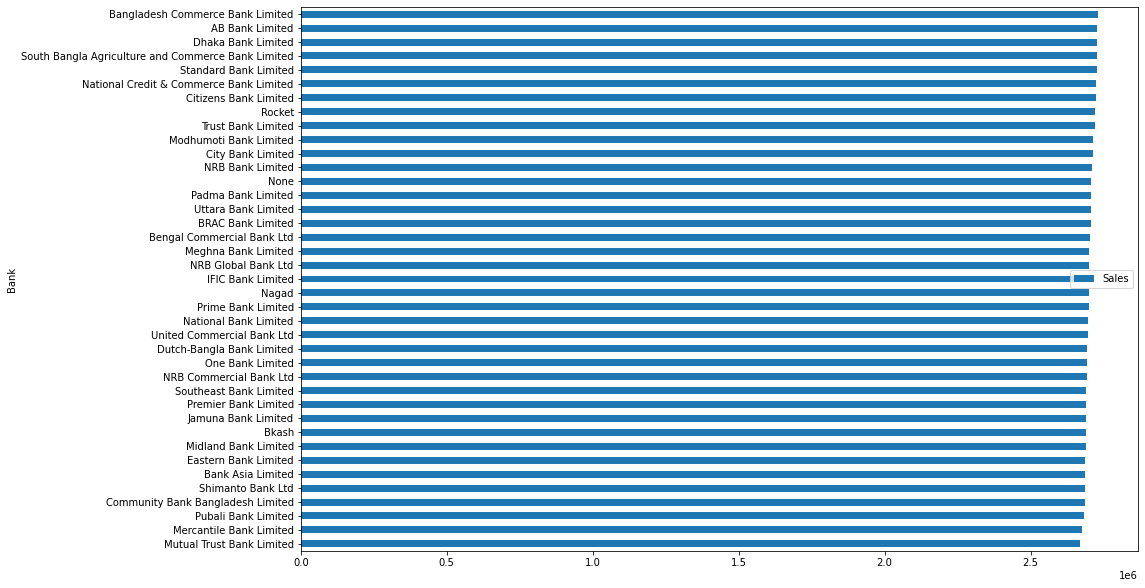

In [5]:
con = PostgresConnection().getConnection()
cur = con.cursor()
# query = "select c.name, t.bank_name, t.trans_type, sum(f.total_price) "\
# "from star_schema.fact_table f "\
# "join star_schema.customer_dim c on c.customer_key=f.customer_key "\
# "join star_schema.trans_dim t on t.payment_key=f.payment_key "\
# "group by CUBE(c.name, t.bank_name, t.trans_type)"
query = "select t.bank_name, sum(f.total_price) "\
"from star_schema.fact_table f "\
"join star_schema.trans_dim t on t.payment_key=f.payment_key "\
"group by cube(t.bank_name) order by sum(f.total_price)"
cur.execute(query)
result = cur.fetchall()
result
pd_data = pd.DataFrame(list(result), columns=['Bank', 'Sales'])
pd_data['Sales'] = pd_data['Sales'].astype('float64')
pd_data = pd_data.dropna()
fig = pd_data.plot.barh(x='Bank', y='Sales', figsize=(15,10), rot=0)

### Q3 ###

In [6]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query = "select sum(t.total_price) "\
"from star_schema.fact_table t "\
"join star_schema.store_dim s on s.store_key=t.store_key where s.division='BARISAL'"
cur.execute(query)
result = cur.fetchall()
result

[(Decimal('7520343.75'),)]

### Q4 ###

In [7]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query = "select sum(f.total_price) " \
        "from star_schema.fact_table f " \
        "join star_schema.time_dim tim on tim.time_key=f.time_key where tim.year=2015"
cur.execute(query)
result = cur.fetchall()
result

[(Decimal('15095720.25'),)]

### Q5 ###

In [8]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query = "select sum(t.total_price) from star_schema.fact_table t join star_schema.store_dim s on s.store_key=t.store_key join star_schema.time_dim tim on tim.time_key=t.time_key where s.division='BARISAL' and tim.year=2015"
cur.execute(query)
result = cur.fetchall()
result

[(Decimal('1076902.75'),)]

### Q6 ###

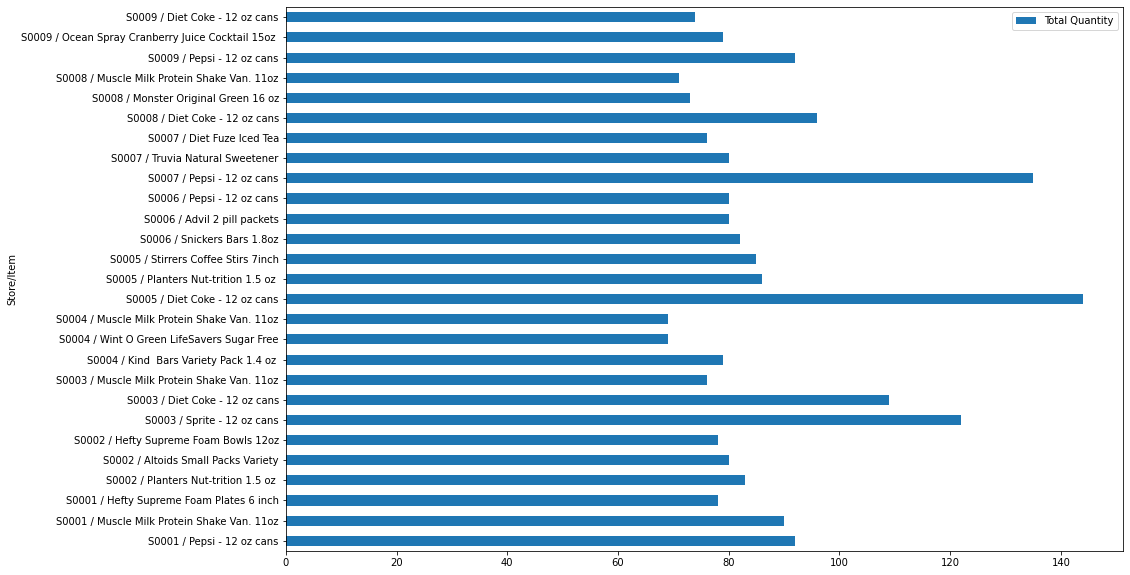

In [9]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query = "select s.store_key, i.item_name, sum(f.quantity) "\
"from star_schema.fact_table f "\
"join star_schema.store_dim s on s.store_key=f.store_key "\
"join star_schema.item_dim i on i.item_key=f.item_key "\
"group by cube(s.store_key, i.item_name) "\
"order by s.store_key, sum(f.quantity) desc"
cur.execute(query)
result = cur.fetchall()
result
pd_data = pd.DataFrame(list(result), columns=['Store', 'Item', 'Total Quantity'])
pd_data = pd_data.dropna()
pd_data = pd_data.groupby('Store').head(3)
pd_data = pd_data.head(27)
pd_data['Total Quantity'] = pd_data['Total Quantity'].astype('int64')
pd_data['Store/Item'] = pd_data['Store'] + ' / ' + pd_data['Item']
fig = pd_data.plot.barh(x='Store/Item', y='Total Quantity', figsize=(15,10), rot=0)

### Q7 ###

In [10]:
days = int(input('Enter no. of days for the query: '))
con = PostgresConnection().getConnection()
cur = con.cursor()
query = "select i.item_name "\
"from star_schema.fact_table f "\
"join star_schema.trans_dim t on t.payment_key=f.payment_key "\
"join star_schema.item_dim i on i.item_key=f.item_key "\
"join star_schema.time_dim td on td.time_key = f.time_key "\
"where t.trans_type='card' or t.trans_type='mobile' and td.t_date > (CURRENT_DATE - INTERVAL '{} days')".format(days)
cur.execute(query)
result = cur.fetchall()
result


Enter no. of days for the query: 90


[('M&M Peanut Candy 1.7 oz',),
 ('Charmin Ultra Bath Tissue',),
 ('Dole Fruit in Gel Cups 4.3 oz',),
 ('Paper Bowls 20 oz Ultra Strong',),
 ('Waterloo Sparkling Watermelon 12oz',),
 ('Premier Protein Shake Choc. 11oz',),
 ('Brisk Lemon Iced Tea - 12 oz cans',),
 ('Belvita Protein Oats Soft Biscuit',),
 ('Fresca Black Cherry - 12 oz cans',),
 ('Clear Plastic Cups 9oz',),
 ('G2 Lo Calorie Variety 20 oz',),
 ('Pepsi - 12 oz cans',),
 ('Breath Savers Peppermints 12/roll ',),
 ('100% Juice Box Variety 6.75 oz ',),
 ('Goldfish Pepperidge Farm Cheddar 1.5oz ',),
 ('Nestle Purelife 16oz ',),
 ('Pure White Sugar Packets',),
 ('Doritos Nacho Cheese 1 oz',),
 ('Cheez It White Cheddar 1.5 oz',),
 ('Waterloo Sparkling Lime 12oz',),
 ('Pure White Sugar Packets',),
 ('Pure Leaf Sweet Tea 8.5oz',),
 ('K Cups - McCafe Premium Roast',),
 ('Pure Leaf Unsweetened Tea 18.5oz',),
 ('Charmin Ultra Bath Tissue',),
 ('K Cups Hot Cocoa',),
 ('Gatorade Frost Variety 20 oz ',),
 ('Folgers 100% Colombian Coffee',)

### Q8 ###

In [11]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query = "select i.item_name, td.quarter, sum(f.total_price) "\
"from star_schema.fact_table f "\
"join star_schema.item_dim i on i.item_key=f.item_key "\
"join star_schema.time_dim td on td.time_key = f.time_key "\
"group by i.item_name, td.quarter "\
"order by i.item_name, sum(f.total_price)"
cur.execute(query)
result = cur.fetchall()
pd_data = pd.DataFrame(list(result), columns=['Item', 'Quarter', 'Sales'])
pd_data = pd_data.dropna()
pd_data = pd_data.groupby('Item').head(1)
pd_data['Worst'] = pd_data['Item'] + ' -> ' + pd_data['Quarter']
pd_data['Worst']

0             100% Juice Box Variety 6.75 oz  -> Q1
4                  A&W Root Beer - 12 oz cans -> Q2
8             A&W Root Beer Diet - 12 oz cans -> Q4
12                       Advil 2 pill packets -> Q1
16              All Purpose Cleaner 409 Spray -> Q1
                           ...                     
1016          Welch's 100% Juice Variety10 oz -> Q2
1020       Wint O Green LifeSavers Sugar Free -> Q1
1024          Wonderful Pistachios (in shell) -> Q1
1028    Yoplait Original Yogurt Variety Pack  -> Q1
1032              Zoo Animal Cookies/Crackers -> Q1
Name: Worst, Length: 259, dtype: object

### Q9 ###

100% Juice Box Variety 6.75 oz 


<AxesSubplot:ylabel='Sales'>

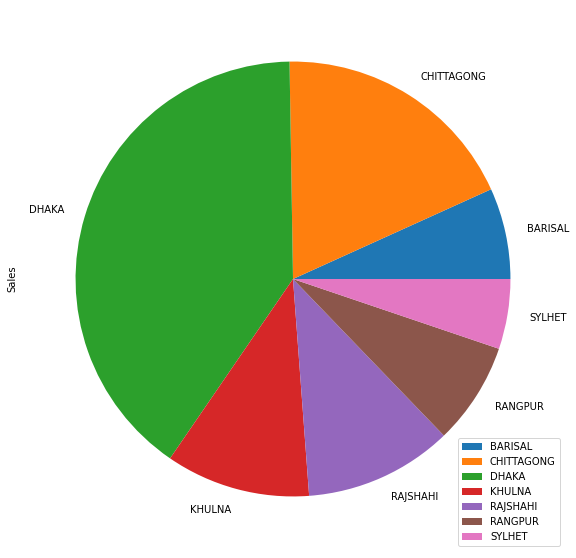

In [14]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query = "select i.item_name, s.division, sum(f.total_price) "\
"from star_schema.fact_table f "\
"join star_schema.item_dim i on i.item_key=f.item_key "\
"join star_schema.store_dim s on s.store_key = f.store_key "\
"where i.item_key ='I00082' "\
"group by i.item_name, s.division "\
"order by i.item_name,s.division"
cur.execute(query)
result = cur.fetchall()
result
pd_data = pd.DataFrame(list(result), columns=['Item', 'Division', 'Sales'])
pd_data.set_index("Division", inplace = True)
pd_data['Sales'] = pd_data['Sales'].astype('float64')
print(pd_data['Item'][0])
pd_data.plot.pie(y='Sales', figsize=(15,10))

### Q10 ###

S00164


<AxesSubplot:xlabel='Month'>

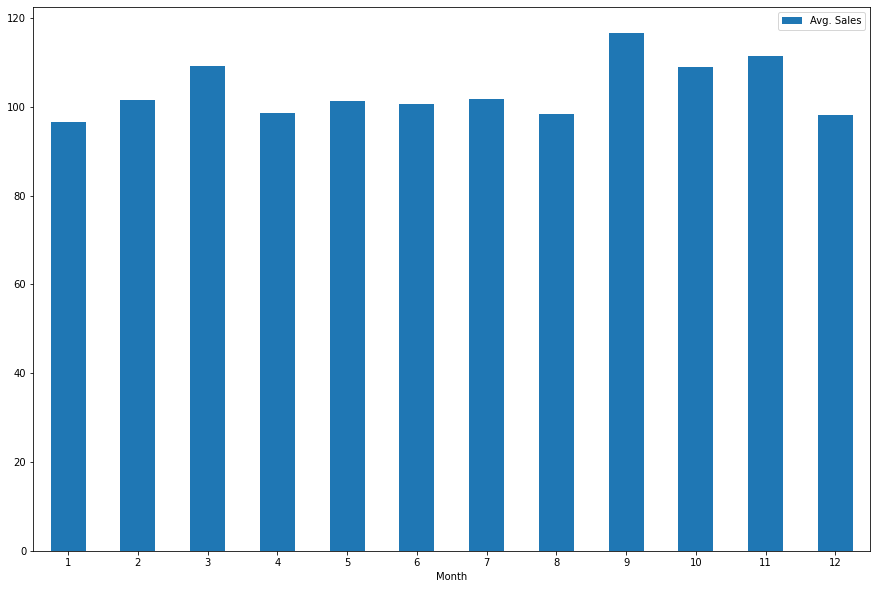

In [15]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query = "select s.store_key, t.month, round(avg(f.total_price)::numeric,2) "\
"from star_schema.fact_table f "\
"join star_schema.store_dim s on s.store_key = f.store_key "\
"join star_schema.time_dim t on t.time_key = f.time_key "\
"where s.store_key = 'S00164' "\
"group by s.store_key, t.month "\
"order by s.store_key, t.month"
cur.execute(query)
result = cur.fetchall()
result
pd_data = pd.DataFrame(list(result), columns=['Store', 'Month', 'Avg. Sales'])
pd_data['Avg. Sales'] = pd_data['Avg. Sales'].astype('float64')
print(pd_data['Store'][0])
pd_data.plot.bar(x='Month', y='Avg. Sales', rot=0, figsize=(15,10))